# Cell-Cell Interaction / Proximity / Co-Occurance Analysis

The `sm.tl.spatial_interaction` function calculates the likelihood of cell types being adjacent to each other, compared to a permuted background, and supports 3D data. This analysis is based on cell centroids, with the option to determine neighbors either by a) a radius from the cell centroid or b) a fixed number of nearest neighbors. The measurement units depend on how the X and Y coordinates are computed. I recommend setting a neighborhood radius between 50-100 microns. By default, MCMCIRO stores XY coordinates in pixels, necessitating a conversion from pixels to microns, which varies based on magnification, binning, and other settings during image acquisition.

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.8


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Load the data that we saved in the last tutorial (with ROIs added)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

### Run spatial interaction tool

In [3]:
adata = sm.tl.spatial_interaction (adata, 
                                  method='radius', 
                                  radius=70, 
                                  label='spatial_interaction_radius')

# if you would like to use set nearest neighbours use method = 'knn' and knn=10

Processing Image: ['exemplar-001--unmicst_cell']
Categories (1, object): ['exemplar-001--unmicst_cell']
Identifying neighbours within 70 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_freq = data.groupby(['phenotype','neighbour_phenotype']).size().unstack()
/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_freq = data.groupby(['phenotype','neighbour_phenotype']).size().unstack()
/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecate

Consolidating the permutation results


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_freq = data.groupby(['phenotype','neighbour_phenotype']).size().unstack()
/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_freq = data.groupby(['phenotype','neighbour_phenotype']).size().unstack()
/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:196: FutureWarning:

The default of observed=False is deprecat

Let's take a look at the results

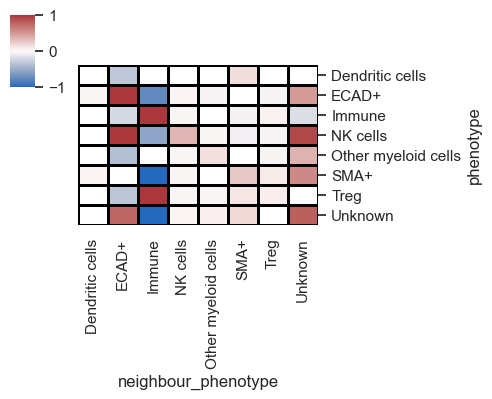

In [6]:
sm.pl.spatial_interaction(adata, 
                          spatial_interaction='spatial_interaction_radius',
                          linewidths=0.75, linecolor='black', figsize=(5,4))

In the depicted plot, red and blue signify the likelihood of two cell types being adjacent to each other, while grey denotes interactions that lack significance.

It's important to understand that when analyzing multiple images, the results represent an average across all the images involved. Since the demo contains only one image, to simulate multiple images, let's once again utilize the ROIs, treating them as distinct images for analysis purposes.

In [7]:
# rerun the analysis with passing ROI column 
adata = sm.tl.spatial_interaction(adata, 
                                  method='radius', 
                                  imageid = 'ROI',
                                  radius=70, 
                                  label='spatial_interaction_radius_roi')

Processing Image: ['Other']
Categories (1, object): ['Other']
Identifying neighbours within 70 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_freq = data.groupby(['phenotype','neighbour_phenotype']).size().unstack()
/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_freq = data.groupby(['phenotype','neighbour_phenotype']).size().unstack()
/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecate

Consolidating the permutation results
Processing Image: ['ROI2']
Categories (1, object): ['ROI2']
Identifying neighbours within 70 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_freq = data.groupby(['phenotype','neighbour_phenotype']).size().unstack()
/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_freq = data.groupby(['phenotype','neighbour_phenotype']).size().unstack()
/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecate

Consolidating the permutation results
Processing Image: ['ROI1']
Categories (1, object): ['ROI1']
Identifying neighbours within 70 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:196: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:215: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and s

Consolidating the permutation results


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:196: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/spatial_interaction.py:215: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



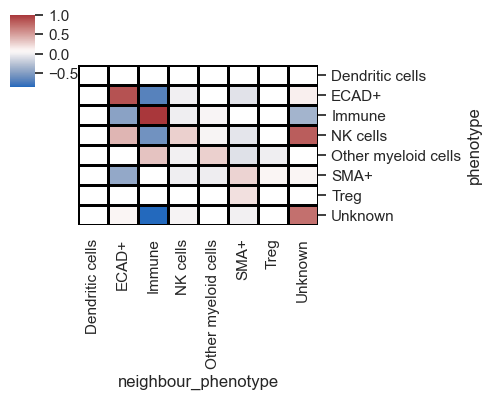

In [8]:
# view the results
sm.pl.spatial_interaction(adata, 
                          spatial_interaction='spatial_interaction_radius_roi',
                          linewidths=0.75, linecolor='black', figsize=(5,4))

This reflects the average across the images (in this case, ROIs), but let's now proceed to visualize the data for each image individually by adding `summarize_plot=False`

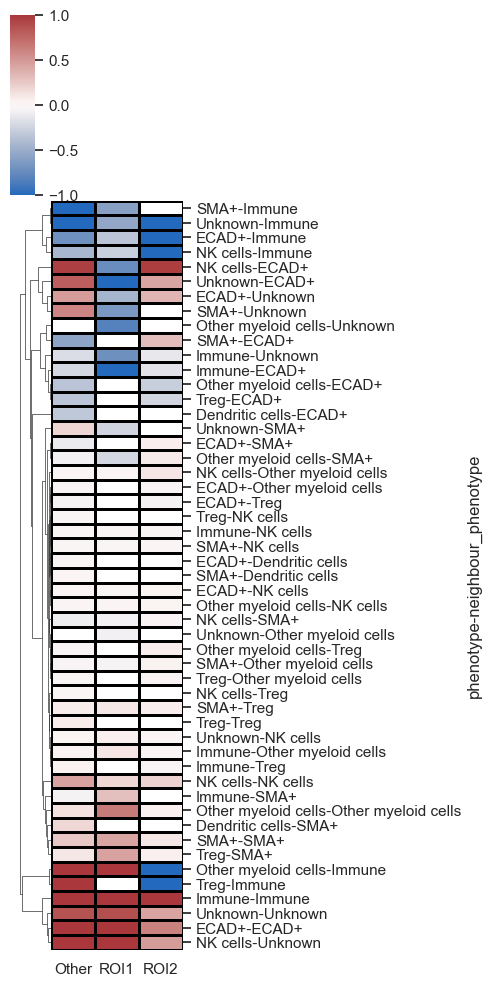

In [14]:
sm.pl.spatial_interaction(adata, 
                          spatial_interaction='spatial_interaction_radius_roi',
                          yticklabels=True, figsize=(5,10), row_cluster=True,
                          summarize_plot=False,
                          linewidths=0.75, linecolor='black')


As seen above, each image (ROIs) is represented on the x-axis, with all pairs of interactions featured on the y-axis. The data is clustered, enabling the identification of the most significant interacting pairs across the images.

You can also set `subset_phenotype` and `subset_neighbour_phenotype` to specifically display only cell types of interest, which is particularly useful for publications.

Lastly, let me introduce a parameter named `binary_view`. When set to `True`, this parameter binarizes the heatmap, omitting the z-scores for simpler interpretation.

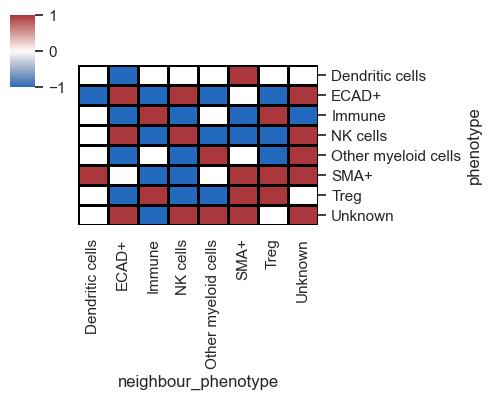

In [15]:
sm.pl.spatial_interaction(adata, 
                          spatial_interaction='spatial_interaction_radius',  binary_view=True,
                          linewidths=0.75, linecolor='black', figsize=(5,4))

Typically, I combine this with distance plots to understand cell distribution across the tissue. Utilizing both distance and interaction plots together effectively highlights interacting cell partners in manuscripts.